### 01 Introduction to CNN and TensorFlow's  Answer

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lenet(images, keep_prob):
    """
    Args:
        images: a 4-D tensor that holds batched input images
    Return:
        A tensor that contains classification probabilities result, and a dictionary
        of all intermediate tensors.
    """    
    end_points = {}
    end_points['images'] = tf.reshape(images, [-1, 28, 28, 1])

    with tf.variable_scope('conv1'):
        w1 = tf.get_variable('weights', [5, 5, 1, 32])
        b1 = tf.get_variable('biases', [32],
                             initializer=tf.zeros_initializer())
        end_points['conv1'] = tf.nn.relu(
            tf.nn.conv2d(end_points['images'], w1, [1, 1, 1, 1], 'SAME') + b1)
    end_points['pool1'] = tf.nn.max_pool(
        end_points['conv1'], [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
    
    with tf.variable_scope('conv2'):
        w2 = tf.get_variable('weights', [5, 5, 32, 64])
        b2 = tf.get_variable('biases', [64],
                             initializer=tf.zeros_initializer())
        end_points['conv2'] = tf.nn.relu(
            tf.nn.conv2d(end_points['pool1'], w2, [1, 1, 1, 1], 'SAME') + b2)
    end_points['pool2'] = tf.nn.max_pool(
        end_points['conv2'], [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
    
    end_points['flatten'] = tf.reshape(end_points['pool2'], [-1, 7 * 7 * 64])
    with tf.variable_scope('fc3'):
        w3 = tf.get_variable('weights', [7 * 7 * 64, 1024])
        b3 = tf.get_variable('biases', [1024],
                             initializer=tf.zeros_initializer())
        end_points['fc3'] = tf.nn.relu(tf.matmul(end_points['flatten'], w3) + b3)
        
    end_points['dropout'] = tf.nn.dropout(end_points['fc3'], keep_prob)
    with tf.variable_scope('fc4'):
        w4 = tf.get_variable('weights', [1024, 10])
        b4 = tf.get_variable('biases', [10],
                             initializer=tf.zeros_initializer())
        end_points['fc4'] = tf.matmul(end_points['fc3'], w4) + b4
    
    return end_points['fc4'], end_points

In [3]:

def visualize_tensor(image, key, channel_idx, axis):
    """
    Visualize a tensor in the trained LeNet model.
    Args:
        image: a test image
        key: the key to the tensor in end_points
        channel_idx: index of the channel to be visualized
        axis: a pyplot Axis object
    """
    g = tf.Graph()
    with g.as_default():
        images = tf.placeholder(tf.float32, shape=[None, 784])
        labels = tf.placeholder(tf.float32, shape=[None, 10])
        keep_prob = tf.placeholder(tf.float32)
        logits, end_points = lenet(images, keep_prob)

        # Nodes for training
        loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits)
        train = tf.train.AdadeltaOptimizer(1e-3).minimize(loss)

        # accuracy
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        saver = tf.train.Saver()
        with tf.Session(graph=g) as sess:
            saver.restore(sess, '../mnist_lenet_log/')
            
            # TODO: finish the line to get the tensor value of end_points[key]
            tensor_val = sess.run(end_points[key], feed_dict={images: [image], keep_prob: 1.0})
            
            # TODO: get the 2D image at channel "channel_idx"
            image_2d = tensor_val[0, :, :, channel_idx]
            
            # TODO: visualize
            axis.set_title(key)
            axis.imshow(image_2d, cmap='gray')

In [4]:
# Make sure that mnist_lenet_log, the directory contains trained model, exists.
!file mnist_lenet_log/

mnist_lenet_log/: cannot open (No such file or directory)


Extracting ../../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../data/MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from ../mnist_lenet_log/
INFO:tensorflow:Restoring parameters from ../mnist_lenet_log/
INFO:tensorflow:Restoring parameters from ../mnist_lenet_log/
INFO:tensorflow:Restoring parameters from ../mnist_lenet_log/
INFO:tensorflow:Restoring parameters from ../mnist_lenet_log/


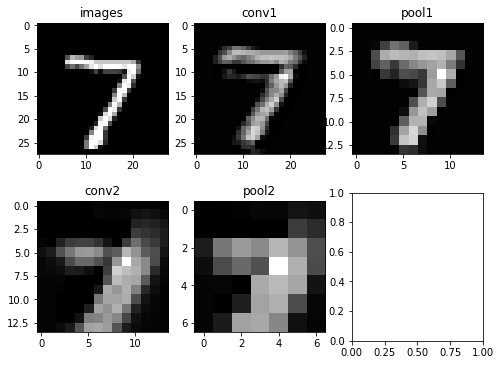

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("../../data/MNIST_data/", one_hot=True)

# TODO: visualize image
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(8, 6))

visualize_tensor(mnist.test.images[0], 'images', 0, ax[0, 0])
visualize_tensor(mnist.test.images[0], 'conv1', 0, ax[0, 1])
visualize_tensor(mnist.test.images[0], 'pool1', 0, ax[0, 2])
visualize_tensor(mnist.test.images[0], 'conv2', 0, ax[1, 0])
visualize_tensor(mnist.test.images[0], 'pool2', 0, ax[1, 1])